Packages and Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D
from keras import models
from keras import layers
import tensorflow as tf
import os
import os.path
from pathlib import Path
import cv2
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.optimizers import RMSprop,Adam
import glob
from PIL import Image

# IGNORING UNNECESSARRY WARNINGS

filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)
filterwarnings("ignore", category=UserWarning)

TRAIN

In [3]:
No_Data_Path = Path("/content/drive/MyDrive/Data Sources/no")
Yes_Data_Path = Path("/content/drive/MyDrive/Data Sources/yes")

In [4]:
No_JPG_Path = list(No_Data_Path.glob(r"*.jpg"))
Yes_JPG_Path = list(Yes_Data_Path.glob(r"*.jpg"))

In [5]:
Yes_No_List = []

for No_JPG in No_JPG_Path:
    Yes_No_List.append(No_JPG)

for Yes_JPG in Yes_JPG_Path:
    Yes_No_List.append(Yes_JPG)

In [6]:
JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Yes_No_List))

In [7]:
print("NO COUNTING: ", JPG_Labels.count("no"))
print("YES COUNTING: ", JPG_Labels.count("yes"))a

NO COUNTING:  1500
YES COUNTING:  1500


In [8]:
# creating pandas Series called JPG_Path_Series from the list Yes_No_List. The name of this Series is set to "JPG".
JPG_Path_Series = pd.Series(Yes_No_List,name="JPG").astype(str)

# creating pandas Series called JPG_Category_Series from the list JPG_Labels. The name of this Series is set to "TUMOR_CATEGORY".
JPG_Category_Series = pd.Series(JPG_Labels,name="TUMOR_CATEGORY")

In [9]:
# concatenates the two pandas Series, JPG_Path_Series and JPG_Category_Series
Main_Train_Data = pd.concat([JPG_Path_Series,JPG_Category_Series],axis=1)

In [10]:
print(Main_Train_Data.head(-1))

                                                    JPG TUMOR_CATEGORY
0     /content/drive/MyDrive/Data Sources/no/no1192.jpg             no
1      /content/drive/MyDrive/Data Sources/no/no174.jpg             no
2      /content/drive/MyDrive/Data Sources/no/no259.jpg             no
3      /content/drive/MyDrive/Data Sources/no/no218.jpg             no
4     /content/drive/MyDrive/Data Sources/no/no1350.jpg             no
...                                                 ...            ...
2994   /content/drive/MyDrive/Data Sources/yes/y132.jpg            yes
2995   /content/drive/MyDrive/Data Sources/yes/y149.jpg            yes
2996  /content/drive/MyDrive/Data Sources/yes/y1342.jpg            yes
2997  /content/drive/MyDrive/Data Sources/yes/y1054.jpg            yes
2998  /content/drive/MyDrive/Data Sources/yes/y1347.jpg            yes

[2999 rows x 2 columns]


In [11]:
# This line creates a Path object called Prediction_Path, where the prediction data (test JPG files) is located.
Prediction_Path = Path("/content/drive/MyDrive/Data Sources/pred")

In [12]:
# retrieves all the file paths in the Prediction_Path directory that have the extension ".jpg". The result is stored in the list Test_JPG_Path
Test_JPG_Path = list(Prediction_Path.glob(r"*.jpg"))

In [13]:
# map() function and a lambda function to extract the labels ('yes' or 'no') from the file paths in the Test_JPG_Path list.
Test_JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Test_JPG_Path))

In [14]:
# creates a pandas Series called Test_JPG_Path_Series
Test_JPG_Path_Series = pd.Series(Test_JPG_Path,name="JPG").astype(str)
# creates a pandas Series called Test_JPG_Labels_Series
Test_JPG_Labels_Series = pd.Series(Test_JPG_Labels,name="TUMOR_CATEGORY")

In [15]:
# oncatenates the two pandas Series, Test_JPG_Path_Series and Test_JPG_Labels_Series, along axis=1
Test_Data = pd.concat([Test_JPG_Path_Series,Test_JPG_Labels_Series],axis=1)

In [16]:
print(Test_Data.head())

                                                 JPG TUMOR_CATEGORY
0  /content/drive/MyDrive/Data Sources/pred/pred2...           pred
1  /content/drive/MyDrive/Data Sources/pred/pred2...           pred
2  /content/drive/MyDrive/Data Sources/pred/pred1...           pred
3  /content/drive/MyDrive/Data Sources/pred/pred2...           pred
4  /content/drive/MyDrive/Data Sources/pred/pred5...           pred


Shuffling

In [17]:
# shuffles the rows of the Main_Train_Data DataFrame randomly using the sample() method
Main_Train_Data = Main_Train_Data.sample(frac=1).reset_index(drop=True)

In [18]:
print(Main_Train_Data.head(-1))

                                                    JPG TUMOR_CATEGORY
0       /content/drive/MyDrive/Data Sources/no/no71.jpg             no
1     /content/drive/MyDrive/Data Sources/yes/y1184.jpg            yes
2      /content/drive/MyDrive/Data Sources/yes/y621.jpg            yes
3      /content/drive/MyDrive/Data Sources/no/no571.jpg             no
4      /content/drive/MyDrive/Data Sources/no/no607.jpg             no
...                                                 ...            ...
2994   /content/drive/MyDrive/Data Sources/yes/y361.jpg            yes
2995  /content/drive/MyDrive/Data Sources/yes/y1499.jpg            yes
2996   /content/drive/MyDrive/Data Sources/no/no507.jpg             no
2997   /content/drive/MyDrive/Data Sources/no/no154.jpg             no
2998   /content/drive/MyDrive/Data Sources/yes/y278.jpg            yes

[2999 rows x 2 columns]


Visualization

Text(0.5, 1.0, 'yes')

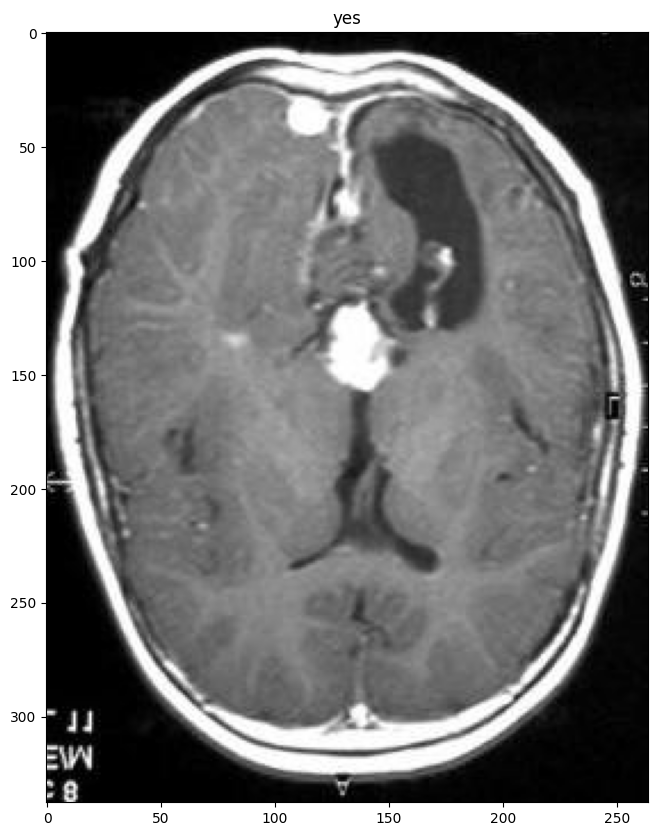

In [19]:
figure = plt.figure(figsize=(10,10))
plt.imshow(plt.imread(Main_Train_Data["JPG"][10]))
plt.title(Main_Train_Data["TUMOR_CATEGORY"][10])

Text(0.5, 1.0, 'no')

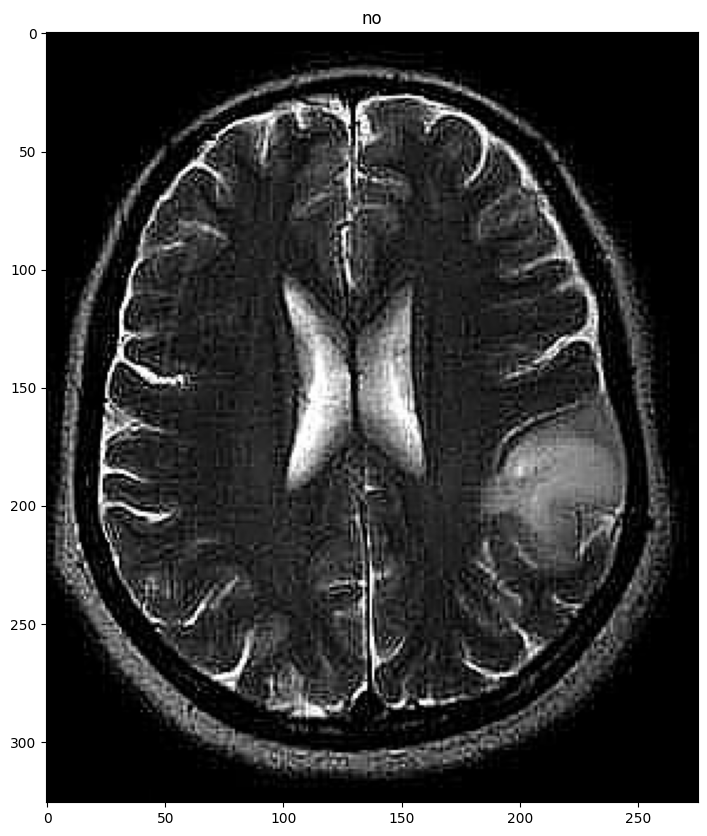

In [20]:
figure = plt.figure(figsize=(10,10))
plt.imshow(plt.imread(Main_Train_Data["JPG"][2997]))
plt.title(Main_Train_Data["TUMOR_CATEGORY"][2997])

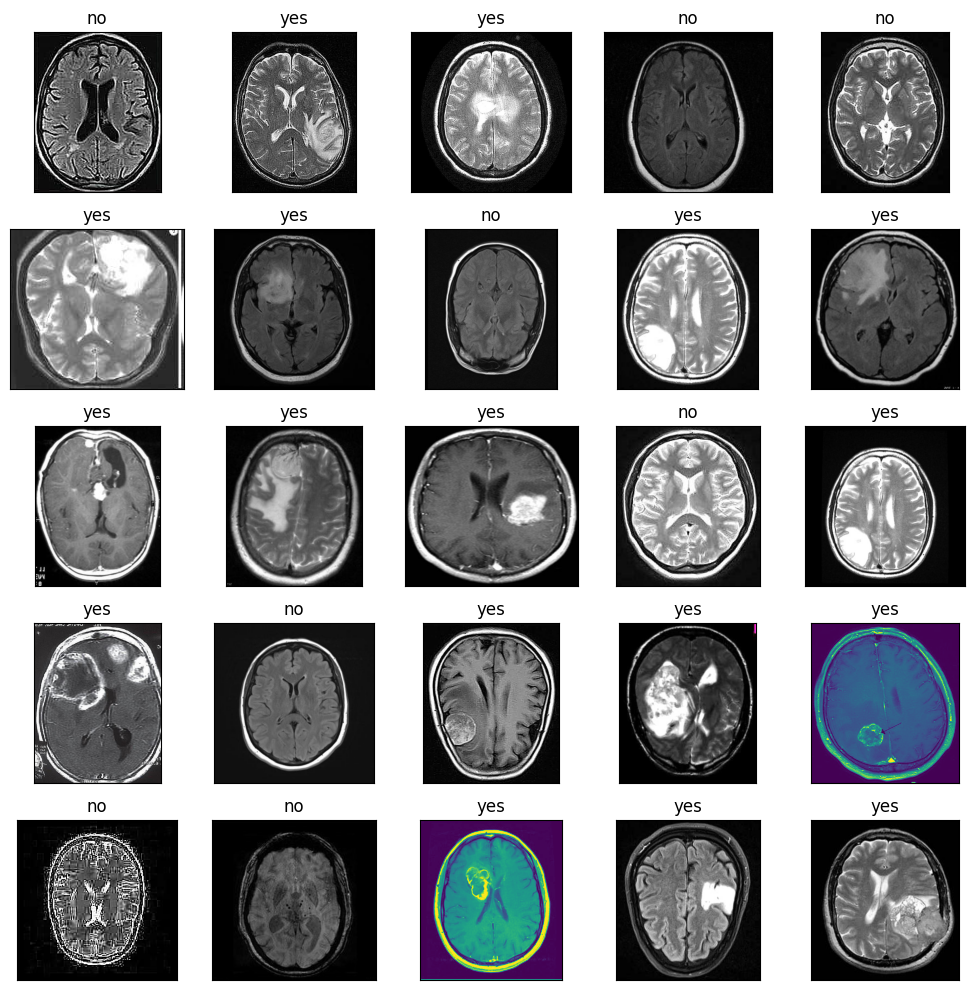

In [21]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Train_Data["JPG"][i]))
    ax.set_title(Main_Train_Data["TUMOR_CATEGORY"][i])
plt.tight_layout()
plt.show()

Model training data

In [22]:
# the train_test_split function from scikit-learn to split the Main_Train_Data DataFrame into training and testing datasets.
# train_size=0.9 specifies that 90% of the data will be used for training
# The resulting training dataset is stored in train_data, and the testing dataset is stored in test_data.
train_data,test_data = train_test_split(Main_Train_Data,train_size=0.9,random_state=42)

In [23]:
print(train_data.shape)

(2700, 2)


In [24]:
print(train_data.head())

                                                    JPG TUMOR_CATEGORY
433   /content/drive/MyDrive/Data Sources/yes/y1404.jpg            yes
1151   /content/drive/MyDrive/Data Sources/yes/y686.jpg            yes
73    /content/drive/MyDrive/Data Sources/yes/y1044.jpg            yes
1536  /content/drive/MyDrive/Data Sources/no/no1427.jpg             no
2709   /content/drive/MyDrive/Data Sources/no/no951.jpg             no


In [25]:
print(test_data.shape)

(300, 2)


In [26]:
print(test_data.head())

                                                    JPG TUMOR_CATEGORY
1801   /content/drive/MyDrive/Data Sources/no/no849.jpg             no
1190   /content/drive/MyDrive/Data Sources/yes/y536.jpg            yes
1817  /content/drive/MyDrive/Data Sources/yes/y1334.jpg            yes
251      /content/drive/MyDrive/Data Sources/yes/y7.jpg            yes
2505   /content/drive/MyDrive/Data Sources/no/no206.jpg             no


In [27]:
# tf.keras.preprocessing.image.ImageDataGenerator is a powerful tool for data augmentation and preprocessing in deep learning
# validation_split=0.1 sets aside 10% of the training data for validation during training.
Generator_Basic = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=0.1)

In [28]:
# This line creates a generator (Train_Set) that will feed data to the model during training.
Train_Set = Generator_Basic.flow_from_dataframe(dataframe=train_data,
                                               x_col="JPG",
                                               y_col="TUMOR_CATEGORY",
                                               color_mode="grayscale",
                                               class_mode="categorical",
                                               subset="training",
                                               batch_size=20,
                                               target_size=(200,200))

Found 2430 validated image filenames belonging to 2 classes.


In [29]:
# # This line creates a generator (Validation_Set) that will feed data to the model during validation.
Validation_Set = Generator_Basic.flow_from_dataframe(dataframe=train_data,
                                                     x_col="JPG",
                                                     y_col="TUMOR_CATEGORY",
                                                     color_mode="grayscale",
                                                     class_mode="categorical",
                                                     subset="validation",
                                                     batch_size=20,
                                                     target_size=(200,200))

Found 270 validated image filenames belonging to 2 classes.


In [30]:
# This line creates a generator (Test_Set) that will feed data to the model during testing.
Test_Set = Generator_Basic.flow_from_dataframe(dataframe=test_data,
                                              x_col="JPG",
                                              y_col="TUMOR_CATEGORY",
                                              color_mode="grayscale",
                                              class_mode="categorical",
                                              batch_size=20,
                                              target_size=(200,200))

Found 300 validated image filenames belonging to 2 classes.


Checking

In [31]:
for data_batch,label_batch in Train_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [32]:
for data_batch,label_batch in Validation_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [33]:
for data_batch,label_batch in Test_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [34]:
print(Train_Set.class_indices)
print(Train_Set.classes[0:5])
print(Train_Set.image_shape)

{'no': 0, 'yes': 1}
[1, 0, 0, 0, 1]
(200, 200, 1)


In [35]:
print(Validation_Set.class_indices)
print(Validation_Set.classes[0:5])
print(Validation_Set.image_shape)

{'no': 0, 'yes': 1}
[1, 1, 1, 0, 0]
(200, 200, 1)


In [36]:
print(Test_Set.class_indices)
print(Test_Set.classes[0:5])
print(Test_Set.image_shape)

{'no': 0, 'yes': 1}
[0, 1, 1, 1, 0]
(200, 200, 1)


##  MODEL STRUCTURE

Sequential Model:


*   A "sequential model" is a type of neural network model where the layers are arranged in a linear stack, and the data flows sequentially from one layer to another.
* In this type of model, the output of one layer serves as the input to the next layer, forming a chain-like structure. It's called "sequential" because the flow of data follows a clear sequence from input to output.



In [37]:
Model = tf.keras.models.Sequential()

# adds the first convolutional layer to the model.
# uses the ReLU activation function -> a non-linear function or piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero.
Model.add(Conv2D(32,(5,5),activation="relu",input_shape=(200,200,1)))

# In a CNN, as the input data passes through multiple layers of convolutional operations, the number of feature maps (also known as channels) tends to increase,
# and the spatial dimensions may become quite large.
# This growth in spatial dimensions can result in an increasing number of parameters in subsequent layers,
# leading to increased computational complexity and memory usage.

# Max-pooling addresses this issue by downsampling the feature maps.
# It divides the feature map into non-overlapping rectangular regions (usually squares) and selects the maximum value within each region.
# The selected maximum values are then used to create a downsampled (reduced spatial dimensions) version of the feature map.
Model.add(MaxPool2D((2,2)))

# Dropout is a regularization technique used in neural networks to prevent overfitting.
# Overfitting occurs when a model becomes too specialized to the training data and performs poorly on unseen data.
# It happens when the model learns noise or irrelevant patterns from the training data,
# instead of generalizing to capture the underlying patterns that are applicable to new, unseen data.

# In dropout, during the training phase,
# a certain proportion of randomly selected neurons (input units) in a layer are "dropped out" or "deactivated" temporarily with a probability defined by the dropout rate.
# here dropout rate is 0.2

# By applying dropout, the neural network is forced to be more robust and not overly dependent on specific neurons or pathways.
# The model becomes less sensitive to the presence or absence of any single neuron during training, reducing the risk of overfitting.
Model.add(Dropout(0.2))

# convolutional layer increased to 32 to 64
Model.add(Conv2D(64,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))

# convolutional layer increased to 64 to 128
Model.add(Conv2D(128,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))

# convolutional layer increased to 128 to 254
Model.add(Conv2D(256,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))

# The purpose of adding multiple convolutional blocks is to learn hierarchical features from the input images.


# This layer flattens the 3D output from the convolutional layers into a 1D vector.
# This is necessary to connect the convolutional part of the network to the dense (fully connected) layers.
Model.add(Flatten())
Model.add(Dropout(0.5))

# This adds a dense layer with 512 neurons and uses the ReLU activation function.
# Dense layers are fully connected layers that help process the extracted features and learn complex patterns from the data.
Model.add(Dense(512,activation="relu"))

# This adds the final dense layer with 2 neurons, corresponding to the number of output classes ('yes' and 'no').
# The softmax activation function is used to produce probabilities for each class, indicating the likelihood of an image belonging to each category.
Model.add(Dense(2,activation="softmax"))

# MODEL COMPILE

In [38]:
Model.compile(optimizer=RMSprop(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

# MODEL FITTING



*   The fit() method trains the model by iteratively updating its weights to minimize the loss function and improve accuracy on the training data.
*   ANN_Model stores the history of the training process, not the model itself.


*  The actual trained model is represented by the Model variable defined earlier in the code.





In [39]:
ANN_Model = Model.fit(Train_Set,validation_data=Validation_Set, epochs=30,steps_per_epoch=120)

Epoch 1/30
120/120 [==============================] - 565s 5s/step - loss: 0.8037 - accuracy: 0.7151 - val_loss: 0.3986 - val_accuracy: 0.8148
Epoch 2/30
120/120 [==============================] - 333s 3s/step - loss: 0.4058 - accuracy: 0.8310 - val_loss: 0.3804 - val_accuracy: 0.8296
Epoch 3/30
120/120 [==============================] - 325s 3s/step - loss: 0.3259 - accuracy: 0.8649 - val_loss: 0.2680 - val_accuracy: 0.8926
Epoch 4/30
120/120 [==============================] - 323s 3s/step - loss: 0.2717 - accuracy: 0.8870 - val_loss: 0.2365 - val_accuracy: 0.9185
Epoch 5/30
120/120 [==============================] - 320s 3s/step - loss: 0.2271 - accuracy: 0.9188 - val_loss: 0.1988 - val_accuracy: 0.9407
Epoch 6/30
120/120 [==============================] - 323s 3s/step - loss: 0.1854 - accuracy: 0.9305 - val_loss: 0.1846 - val_accuracy: 0.9407
Epoch 7/30
120/120 [==============================] - 335s 3s/step - loss: 0.1712 - accuracy: 0.9410 - val_loss: 0.1413 - val_accuracy: 0.9556

# MODEL ANALYTICS

In [40]:
HistoryDict = ANN_Model.history

val_losses = HistoryDict["val_loss"]
val_acc = HistoryDict["val_accuracy"]
acc = HistoryDict["accuracy"]
losses = HistoryDict["loss"]
epochs = range(1,len(val_losses)+1)

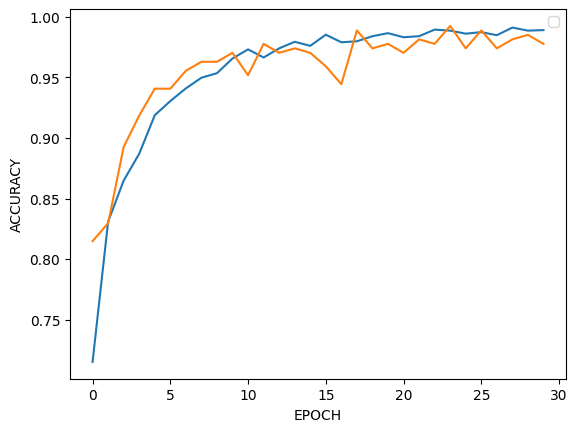

In [41]:
plt.plot(ANN_Model.history["accuracy"])
plt.plot(ANN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.xlabel("EPOCH")
plt.legend()
plt.show()

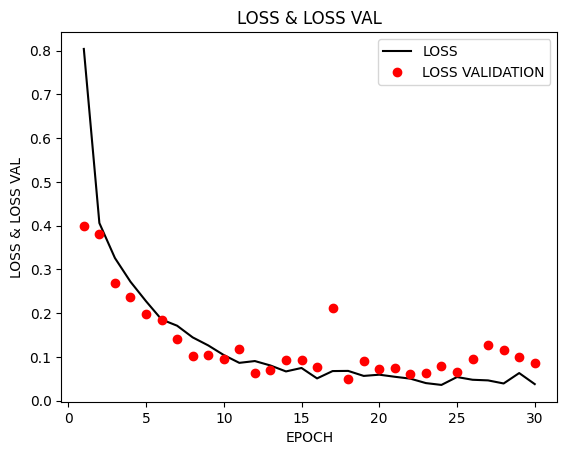

In [42]:
plt.plot(epochs,losses,"k-",label="LOSS")
plt.plot(epochs,val_losses,"ro",label="LOSS VALIDATION")
plt.title("LOSS & LOSS VAL")
plt.xlabel("EPOCH")
plt.ylabel("LOSS & LOSS VAL")
plt.legend()
plt.show()

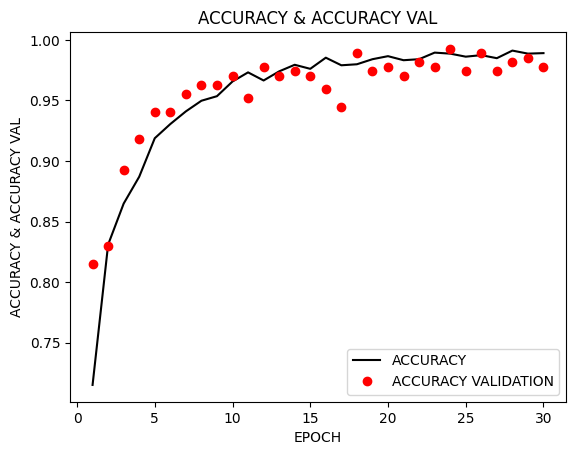

In [43]:
plt.plot(epochs,acc,"k-",label="ACCURACY")
plt.plot(epochs,val_acc,"ro",label="ACCURACY VALIDATION")
plt.title("ACCURACY & ACCURACY VAL")
plt.xlabel("EPOCH")
plt.ylabel("ACCURACY & ACCURACY VAL")
plt.legend()
plt.show()

<Axes: >

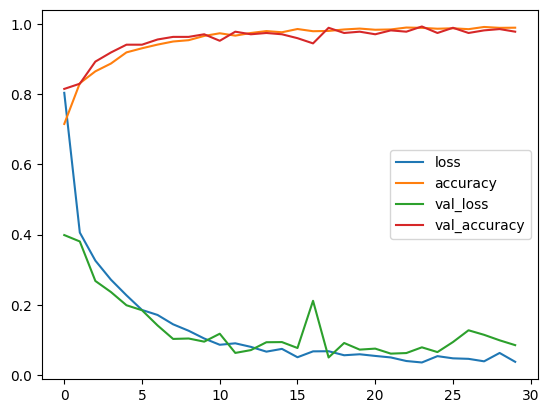

In [44]:
Dict_Summary = pd.DataFrame(ANN_Model.history)
Dict_Summary.plot()

## Prediciton score

In [45]:
Model_Results = Model.evaluate(Test_Set,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

LOSS:  0.0152
ACCURACY:  0.99


In [46]:
Main_Data_Prediction = pd.DataFrame({"JPG":Test_JPG_Path_Series})

In [47]:
print(Main_Data_Prediction.head())

                                                 JPG
0  /content/drive/MyDrive/Data Sources/pred/pred2...
1  /content/drive/MyDrive/Data Sources/pred/pred2...
2  /content/drive/MyDrive/Data Sources/pred/pred1...
3  /content/drive/MyDrive/Data Sources/pred/pred2...
4  /content/drive/MyDrive/Data Sources/pred/pred5...


In [49]:
Main_Test_Generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [51]:
Main_Test_Set = Main_Test_Generator.flow_from_dataframe(dataframe=Main_Data_Prediction,
                                                       x_col="JPG",
                                                       y_col=None,
                                                       color_mode="grayscale",
                                                        class_mode=None,
                                                        batch_size=20,
                                                        target_size=(200,200))

Found 60 validated image filenames.


In [52]:
Model_Test_Prediction = Model.predict(Main_Test_Set)

3/3 [==============================] - 15s 7s/step


In [54]:
Model_Test_Prediction = Model_Test_Prediction.argmax(axis=-1)

In [55]:
print(Model_Test_Prediction)

[0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1
 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]


In [56]:
Last_Prediction = []
[Last_Prediction.append('NO') if i == 1 else Last_Prediction.append('TUMOR') for i in Model_Test_Prediction]
print(Last_Prediction)

['TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'NO', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'NO', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'NO', 'NO', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR']


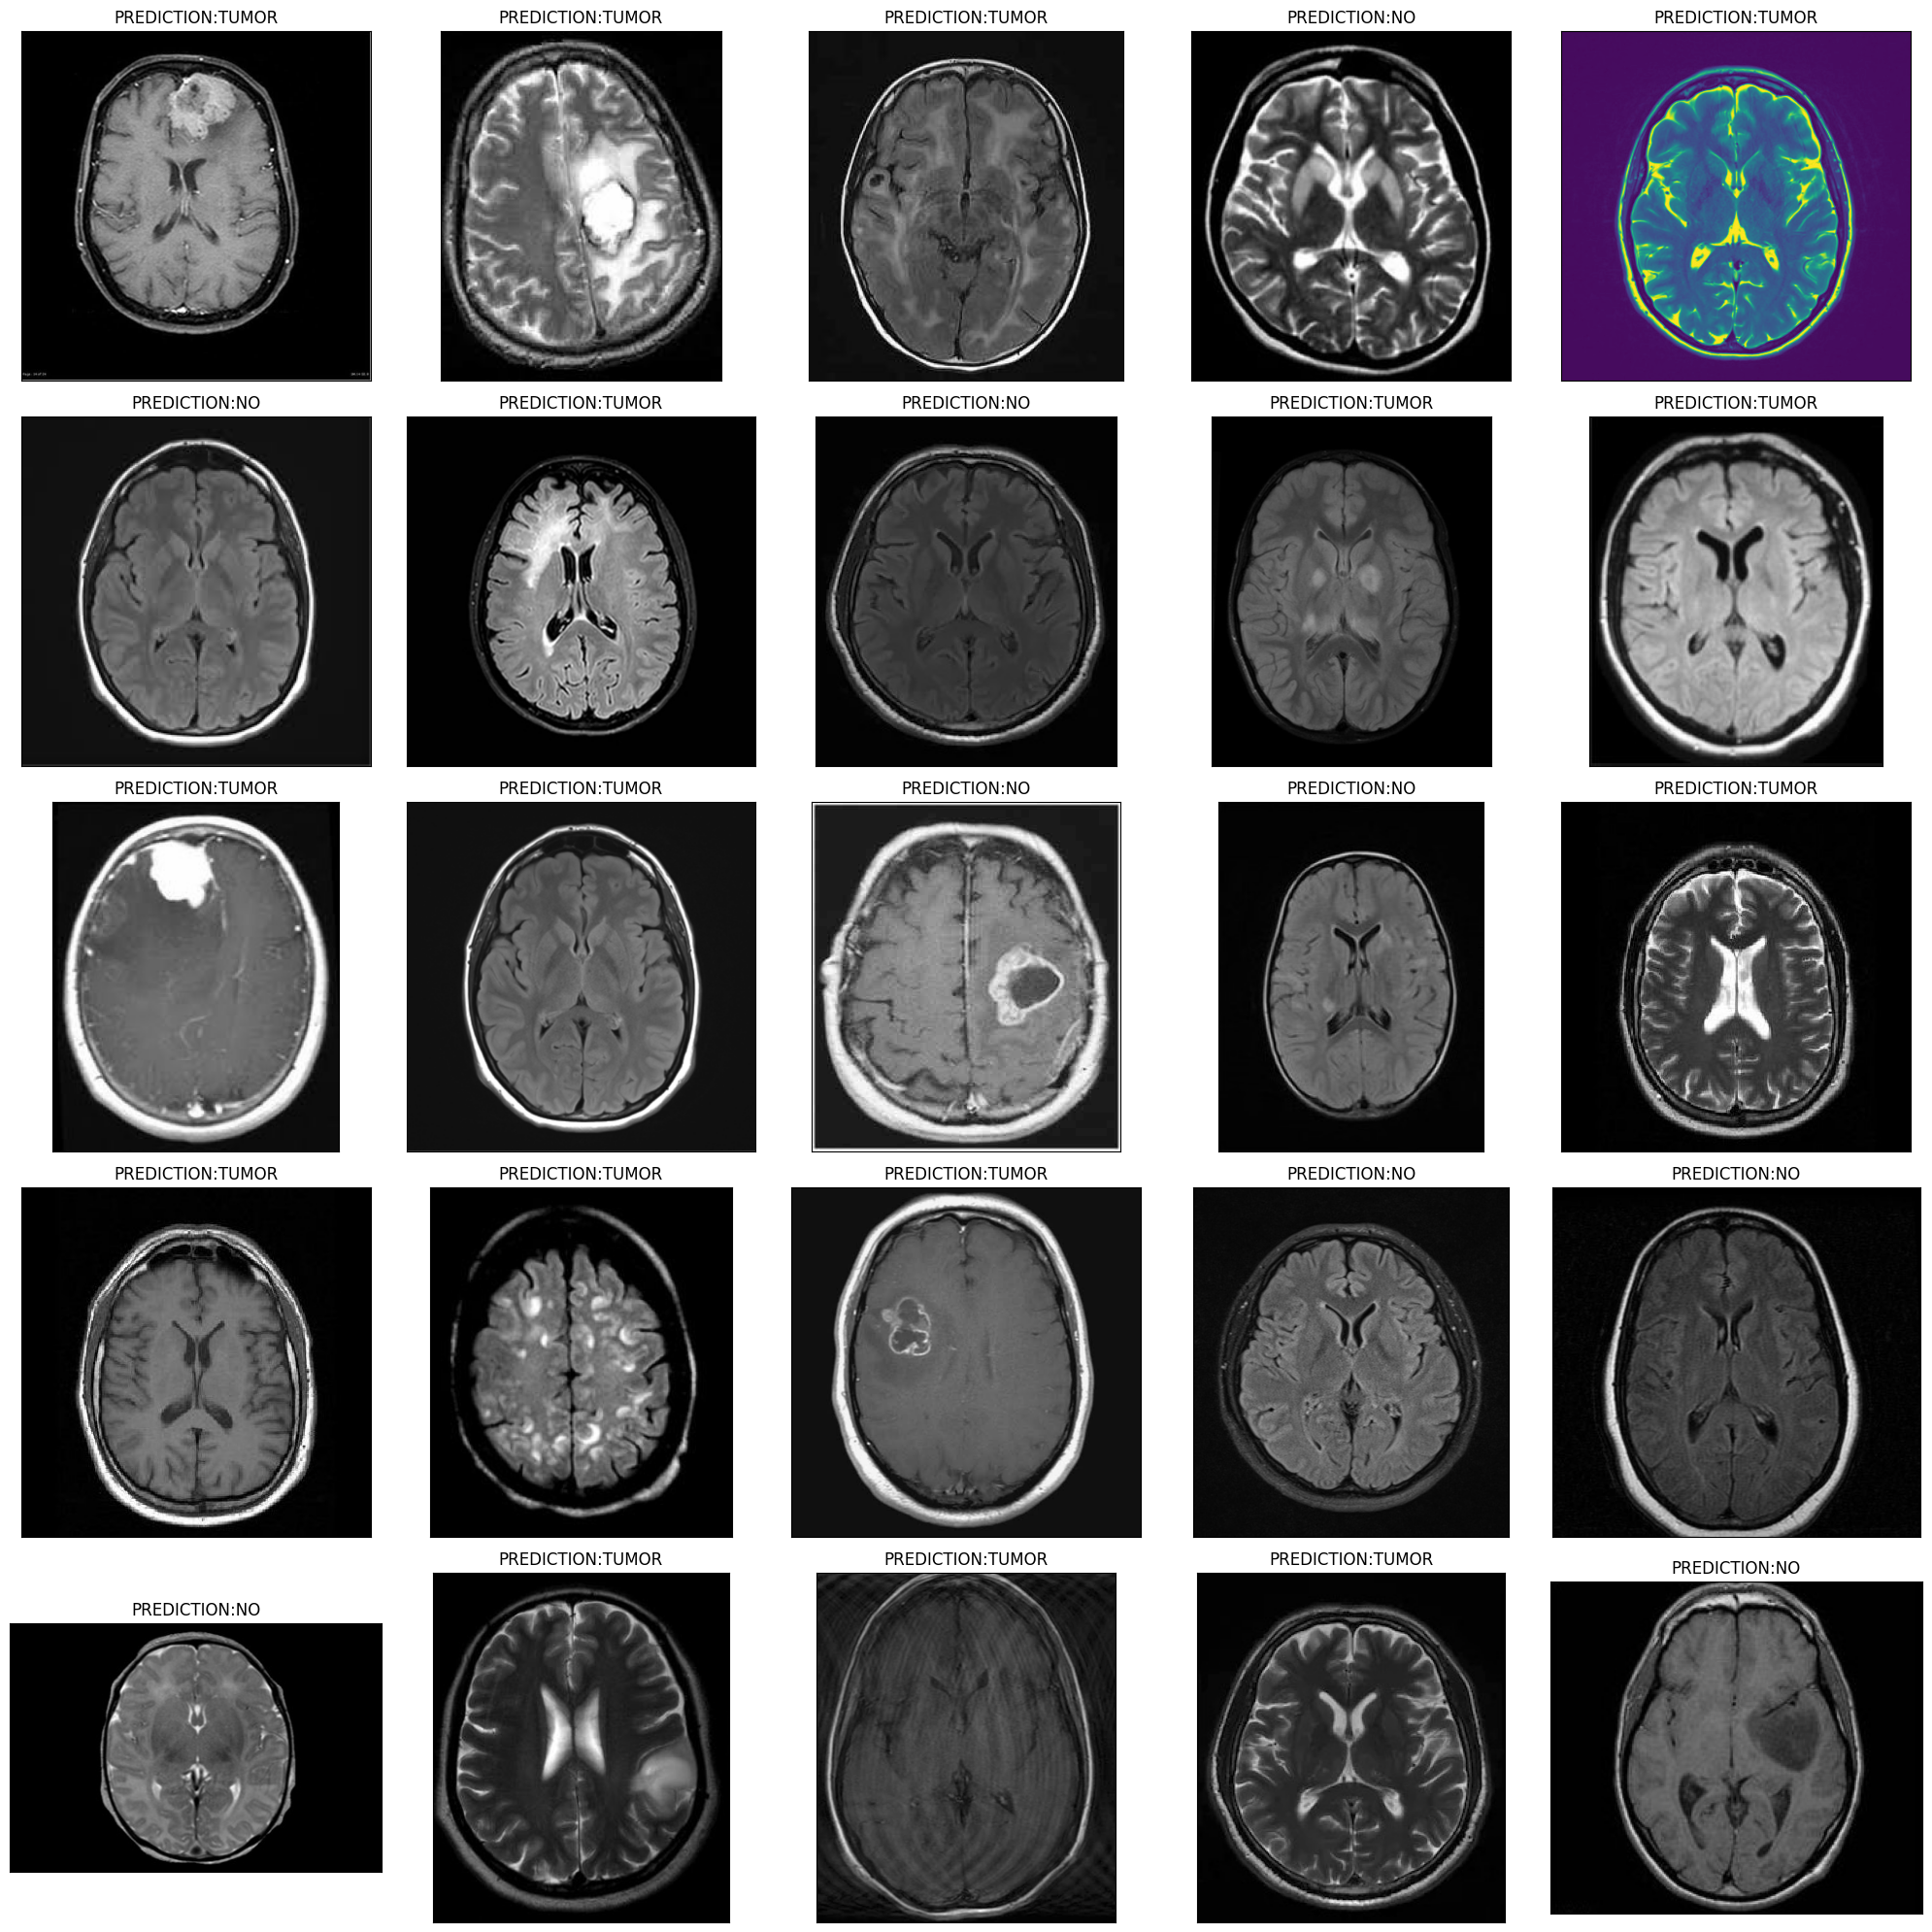

In [57]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Data_Prediction["JPG"].loc[i]))
    ax.set_title(f"PREDICTION:{Last_Prediction[i]}")
plt.tight_layout()
plt.show()